Internet page with example for doing wordcloud in python:

https://www.kaggle.com/adiljadoon/word-cloud-with-python

In [1]:
import pandas as pd
df1 = pd.read_csv('https://query.data.world/s/dv2xwja6ue6tmbcqbst5dnilexrip4')
# dataset is at kaggle - https://data.world/webmadster/phmsa-hazardous-liquid-accident-data-since-2010

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (62,64,65,66,67,68,69,73,75,77,78,79,80,82,90,91,103,105,118,138,139,140,172,182,183,184,185,210,212,226,228,229,240,245,249,253,264,271,273,284,288,290,292,294,296,297,302,308,310,318,322,323,335,337,341,343,371,372,375,376,381,383,385,390,401,408,409,410,411,413,415,430,431,434,437,451,462,468,469,475,476,477,480,481,482,498,504,506,508,509,516,522,524,526,529,530,531,535,536,537,545,548,551,553,554,576) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df1.head()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,2/27/2018,2018,20180064,23185,ORIGINAL FINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,SR. PIPELINE COMPLIANCE ENGINEER,rsromero@eprod.com,713-381-6841,NaN,2/27/2018,RICHARD S ROMERO,SR. PIPELINE COMPLIANCE ENGINEER,713-381-6841,rsromero@eprod.com,ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1,2/20/2018,2018,20180058,23160,ORIGINAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/20/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6462,candress@eprod.com,ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2,2/14/2018,2018,20180042,23135,ORIGINAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/14/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6426,candress@eprod.com,ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
3,2/28/2018,2018,20180066,23190,ORIGINAL,39534,TORRANCE VALLEY PIPELINE COMPANY LLC,1 SYLVAN WAY 2ND FLOOR,PARSIPPANY,NJ,...,REGULATORY ADVISOR,thomas.slosson@pbfenergy.com,310-212-1764,NaN,2/28/2018,THOMAS MCLANE,DIRECTOR OF REGULATORY COMPLIANCE,281-661-4224,thomas.mclane@pbfenergy.com,"AT APPROXIMATELY 10:45 AM PST, AN OPERATOR AT ..."
4,2/22/2018,2018,20180061,23181,SUPPLEMENTAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/26/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6426,candress@eprod.com,"ON 02-05-2018 AT APPROXIMATELY 20:15 HOURS, LO..."


In [3]:
df1.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TITLE', 'PREPARER_EMAIL', 'PREPARER_TELEPHONE',
       'PREPARER_FAX', 'PREPARED_DATE', 'AUTHORIZER_NAME', 'AUTHORIZER_TITLE',
       'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL', 'NARRATIVE'],
      dtype='object', length=588)

In [4]:
df1['NARRATIVE'].head(3)

0    ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1    ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2    ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
Name: NARRATIVE, dtype: object

In [5]:
df1['NARRATIVE'].iloc[1:10]

1    ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2    ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
3    AT APPROXIMATELY 10:45 AM PST, AN OPERATOR AT ...
4    ON 02-05-2018 AT APPROXIMATELY 20:15 HOURS, LO...
5    APPROXIMATELY 4 BBLS OF CRUDE OIL WERE RELEASE...
6    ON 2/1/2018, DCP OPERATOR WAS NOTIFIED BY DCP'...
7    ON 01-31-18 AT APPROXIMATELY 12:30 HOURS, LOCA...
8    THE PIPELINE CONTROLLER RECEIVED A HAZARDOUS A...
9    A CRACK IN A 3/8-INCH THREADED BALL VALVE CONN...
Name: NARRATIVE, dtype: object

In [8]:
narr_text = ''
for text in df1['NARRATIVE']:
    narr_text = narr_text + ' ' + str(text)

In [12]:
len(narr_text)

2695640

In [13]:
narr_text_head = narr_text[:500]

In [14]:
print(narr_text_head)

 ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFIED AN ENTERPRISE EMPLOYEE OF A VAPOR CLOUD INSIDE THE SKELLYTOWN STATION. THE EMPLOYEE NOTIFIED PIPELINE CONTROL WHO THEN SHUTDOWN THE STATION. THE VAPOR CLOUD WAS COMING FROM A FITTING ON THE #1 MAINLINE PUMP. THE FITTING WAS REPLACED AND THE STATION WAS RE-STARTED. ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERATING PERSONNEL DISCOVERED A SAMPLE POT HAD OVERFLOWED DUE TO A FAILED SOLENOID. THE SOLENOID FAILED OPEN WHICH CAUSED THE SAMPLE POT TO OVER


In [15]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 1.7MB/s 
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.


In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [17]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1

In [18]:
stopwords = set(STOPWORDS)

In [19]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(narr_text))

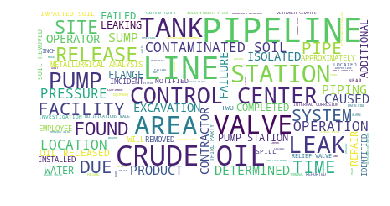

In [ ]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [22]:
df1_colonial = df1[df1['NAME'] == 'COLONIAL PIPELINE CO']

In [23]:
narr_colonial = ''
for text in df1_colonial['NARRATIVE']:
    narr_colonial = narr_colonial + ' ' + str(text)

In [24]:
wordcloud_colonial = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(narr_colonial))

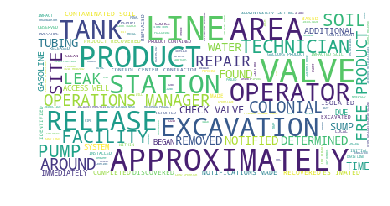

In [25]:
print(wordcloud_colonial)
fig = plt.figure(1)
plt.imshow(wordcloud_colonial)
plt.axis('off')
plt.show()
fig.savefig("colonial.png", dpi=900)

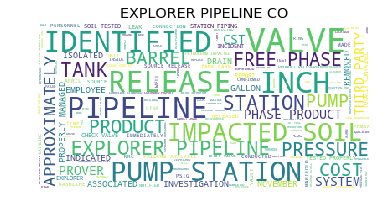

In [32]:
df1_explorer = df1[df1['NAME'] == 'EXPLORER PIPELINE CO']

narr_explorer = ''
for text in df1_explorer['NARRATIVE']:
    narr_explorer = narr_explorer + ' ' + str(text)

wordcloud_explorer = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(narr_explorer))

print(wordcloud_explorer)
fig = plt.figure(1)
plt.imshow(wordcloud_explorer)
plt.axis('off')
plt.title('EXPLORER PIPELINE CO')
plt.show()
fig.savefig("explorer.png", dpi=900)

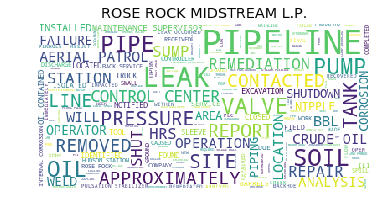

In [34]:
df1_roserock = df1[df1['NAME'] == 'ROSE ROCK MIDSTREAM L.P.']

narr_roserock = ''
for text in df1_roserock['NARRATIVE']:
    narr_roserock = narr_roserock + ' ' + str(text)

wordcloud_roserock = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(narr_roserock))

print(wordcloud_roserock)
fig = plt.figure(1)
plt.imshow(wordcloud_roserock)
plt.axis('off')
plt.title('ROSE ROCK MIDSTREAM L.P.')
plt.show()
fig.savefig("roserock.png", dpi=900)

In [26]:
df1['NAME'].value_counts()

ENTERPRISE CRUDE PIPELINE LLC                     241
SUNOCO PIPELINE L.P.                              196
ENTERPRISE PRODUCTS OPERATING LLC                 179
PLAINS PIPELINE, L.P.                             175
COLONIAL PIPELINE CO                              156
MAGELLAN PIPELINE COMPANY, LP                     154
BUCKEYE PARTNERS, LP                              131
KINDER MORGAN LIQUID TERMINALS, LLC               101
PHILLIPS 66 PIPELINE LLC                          101
MARATHON PIPE LINE LLC                             97
ENBRIDGE ENERGY, LIMITED PARTNERSHIP               81
SHELL PIPELINE CO., L.P.                           70
EXXONMOBIL PIPELINE CO                             54
ONEOK NGL PIPELINE, LLC                            53
EXPLORER PIPELINE CO                               49
ONEOK NGL PIPELINE LP                              39
KOCH PIPELINE COMPANY, L.P.                        38
MAGELLAN AMMONIA PIPELINE, L.P.                    38
NUSTAR PIPELINE OPERATING PA